<a href="https://colab.research.google.com/github/GRUPO3TFM/TFM/blob/main/Modelos_KNN_y_Random_Forest_df1_y_df2_PARTE_MARCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos KNN y Random Forest - retrasos y cancelaciones de trenes

### 1. Cargado de Archivos de Clima, Trenes y Preprocesado

Cargamos desde nuestro entorno local todos los archivos de lluvias, temperaturas y viento al Colab.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving temperature_Essen_01303.txt to temperature_Essen_01303.txt
Saving temperature_Nürnberg_03668.txt to temperature_Nürnberg_03668.txt
Saving Precipitacion_Essen_01303.txt to Precipitacion_Essen_01303.txt
Saving Extreme_wind_Bielefeld_04371.txt to Extreme_wind_Bielefeld_04371.txt
Saving Precipitacion_Dortmund_02483.txt to Precipitacion_Dortmund_02483.txt
Saving Extreme_wind_Münster(Westf)_01766.txt to Extreme_wind_Münster(Westf)_01766.txt
Saving Extreme_wind_Dortmund_02483.txt to Extreme_wind_Dortmund_02483.txt
Saving temperature_Berlin_00433.txt to temperature_Berlin_00433.txt
Saving temperature_Hamburg_01975.txt to temperature_Hamburg_01975.txt
Saving temperature_Munchen_03379.txt to temperature_Munchen_03379.txt
Saving temperature_Bonn_02667.txt to temperature_Bonn_02667.txt
Saving temperature_Stuttgart_04928.txt to temperature_Stuttgart_04928.txt
Saving temperature_Düsseldorf_01078.txt to temperature_Düsseldorf_01078.txt
Saving temperature_Leipzig_02928.txt to temperature_Leipzi

### 2. Limpiamos y Preprocesamos Dataframe Lluvias por hora y ciudad.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
import numpy as np

In [4]:
uploaded_files = glob.glob("/content/Precipitacion_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'R1', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'R1': 'lluvia_mm'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    rain_data = pd.concat(dataframes, ignore_index=True)
    display(rain_data.head())
    display(rain_data.describe())
    distinct_cities = rain_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,lluvia_mm,city
0,2024-07-07 00:00:00,0.0,Bonn
1,2024-07-07 01:00:00,0.0,Bonn
2,2024-07-07 02:00:00,0.0,Bonn
3,2024-07-07 03:00:00,0.0,Bonn
4,2024-07-07 04:00:00,0.0,Bonn


,datetime,lluvia_mm
count,34207,34207.000000
mean,2024-08-11 16:24:19.175022848,-0.005101
min,2024-07-07 00:00:00,-999.000000
25%,2024-07-24 19:00:00,0.000000
50%,2024-08-11 15:00:00,0.000000
75%,2024-08-29 10:00:00,0.000000
max,2024-09-16 23:00:00,32.900000
std,NaN,10.833614


array(['Bonn', 'Dresden', 'Berlin', 'Wuppertal', 'Bremen', 'Dortmund',
       'Bochum', 'Stuttgart', 'Essen', 'Bielefeld', 'Koln',
       'Münster(Westf)', 'Frankfurt_am_Main', 'Hannover', 'Duisburg',
       'Leipzig', 'Düsseldorf', 'Hamburg', 'Nürnberg', 'Munchen'],
      dtype=object)

In [5]:
#Diccionario creado para corregir los nombres mal codificados
corrections = {
    'Düsseldorf': 'Düsseldorf',
    'Münster(Westf)': 'Münster(Westf)',
    'Nürnberg': 'Nürnberg',
    'Koln': 'Köln',
    'Munchen': 'München'
}

# Aplicar las correcciones directamente en el DataFrame ya cargado
rain_data['city'] = rain_data['city'].replace(corrections)

# Verificar si los cambios se han aplicado correctamente
display(rain_data['city'].unique())

array(['Bonn', 'Dresden', 'Berlin', 'Wuppertal', 'Bremen', 'Dortmund',
       'Bochum', 'Stuttgart', 'Essen', 'Bielefeld', 'Köln',
       'Münster(Westf)', 'Frankfurt_am_Main', 'Hannover', 'Duisburg',
       'Leipzig', 'Düsseldorf', 'Hamburg', 'Nürnberg', 'München'],
      dtype=object)

### 3. Limpiamos y Preprocesamos Dataframe Vientos por hora y ciudad.

In [6]:
uploaded_files = glob.glob("/content/Extreme_wind_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[2:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'FX_911', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'FX_911': 'windspeed_mps'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    wind_data = pd.concat(dataframes, ignore_index=True)
    display(wind_data.head())
    display(wind_data.describe())
    distinct_cities = wind_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,windspeed_mps,city
0,2024-07-07 00:00:00,10.4,Bielefeld
1,2024-07-07 01:00:00,8.5,Bielefeld
2,2024-07-07 02:00:00,7.4,Bielefeld
3,2024-07-07 03:00:00,5.1,Bielefeld
4,2024-07-07 04:00:00,2.9,Bielefeld


,datetime,windspeed_mps
count,34419,34419.000000
mean,2024-08-12 01:29:56.600714752,5.496577
min,2024-07-07 00:00:00,-999.000000
25%,2024-07-25 04:00:00,3.400000
50%,2024-08-12 02:00:00,5.100000
75%,2024-08-30 01:00:00,7.400000
max,2024-09-16 23:00:00,28.000000
std,NaN,13.606858


array(['Bielefeld', 'Hamburg', 'Wuppertal', 'Munchen', 'Dortmund',
       'Duisburg', 'Düsseldorf', 'Leipzig', 'Koln', 'Hannover', 'Bonn',
       'Bremen', 'Bochum', 'Münster(Westf)', 'Frankfurt_am_Main', 'Essen',
       'Stuttgart', 'Berlin', 'Nürnberg', 'Dresden'], dtype=object)

In [7]:
# Aplicar las correcciones directamente en el DataFrame ya cargado
wind_data['city'] = wind_data['city'].replace(corrections)

# Verificar si los cambios se han aplicado correctamente
display(wind_data['city'].unique())


array(['Bielefeld', 'Hamburg', 'Wuppertal', 'München', 'Dortmund',
       'Duisburg', 'Düsseldorf', 'Leipzig', 'Köln', 'Hannover', 'Bonn',
       'Bremen', 'Bochum', 'Münster(Westf)', 'Frankfurt_am_Main', 'Essen',
       'Stuttgart', 'Berlin', 'Nürnberg', 'Dresden'], dtype=object)

### 4. Limpiamos y Preprocesamos Dataframe para Temperaturas por hora y ciudad.

In [8]:
uploaded_files = glob.glob("/content/temperature_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])  # Ajuste para extraer correctamente el nombre de la ciudad
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        required_columns = ['TX_10', 'TX5_10', 'TN_10', 'TN5_10']
        if all(col in df.columns for col in required_columns):
            df = df[['MESS_DATUM', 'TX_10', 'TX5_10', 'TN_10', 'TN5_10', 'city']]
            df.rename(columns={
                'MESS_DATUM': 'datetime',
                'TX_10': 'max_temp_2m_C',
                'TX5_10': 'max_temp_5cm_C',
                'TN_10': 'min_temp_2m_C',
                'TN5_10': 'min_temp_5cm_C'
            }, inplace=True)
            df.replace(-999, np.nan, inplace=True)

            df_num = df.drop(columns=['city'])
            df_num.set_index('datetime', inplace=True)
            df_num = df_num.resample('H').mean().reset_index()
            df_num['city'] = city

            dataframes.append(df_num)
        else:
            print(f"El archivo {file_path} no contiene las columnas necesarias y será omitido.")
    except Exception as e:
        print(f"Error al procesar el archivo {file_path}: {e}")

if dataframes:
    temp_data = pd.concat(dataframes, ignore_index=True)
    display(temp_data.head())
    display(temp_data.describe())
    distinct_cities = temp_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C,city
0,2024-07-07 00:00:00,16.166667,NaN,15.933333,15.083333,Nürnberg
1,2024-07-07 01:00:00,15.483333,NaN,15.316667,14.350000,Nürnberg
2,2024-07-07 02:00:00,15.050000,NaN,14.883333,13.583333,Nürnberg
3,2024-07-07 03:00:00,14.516667,NaN,14.350000,13.083333,Nürnberg
4,2024-07-07 04:00:00,14.366667,NaN,14.266667,13.483333,Nürnberg


,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C
count,34662,34655.000000,0.0,34655.000000,34655.000000
mean,2024-08-12 04:00:28.976977664,19.689436,NaN,19.322599,19.564004
min,2024-07-07 00:00:00,2.800000,NaN,2.683333,1.766667
25%,2024-07-25 01:00:00,16.383333,NaN,16.116667,15.283333
50%,2024-08-12 02:00:00,19.466667,NaN,19.150000,18.783333
75%,2024-08-30 03:00:00,22.966667,NaN,22.500000,23.666667
max,2024-09-17 23:00:00,35.233333,NaN,34.483333,40.650000
std,NaN,5.083025,NaN,4.987681,6.305961


array(['Nürnberg', 'Stuttgart', 'Münster(Westf)', 'Dresden', 'Hannover',
       'Bielefeld', 'Dortmund', 'Bonn', 'Frankfurt_am_Main', 'Berlin',
       'Duisburg', 'Düsseldorf', 'Essen', 'Koln', 'Bremen', 'Bochum',
       'Leipzig', 'Wuppertal', 'Munchen', 'Hamburg'], dtype=object)

In [9]:
# Aplicamos las correcciones directamente en el DataFrame ya cargado
temp_data['city'] = temp_data['city'].replace(corrections)

#revisamos si los cambios se han aplicado correctamente
display(temp_data['city'].unique())

array(['Nürnberg', 'Stuttgart', 'Münster(Westf)', 'Dresden', 'Hannover',
       'Bielefeld', 'Dortmund', 'Bonn', 'Frankfurt_am_Main', 'Berlin',
       'Duisburg', 'Düsseldorf', 'Essen', 'Köln', 'Bremen', 'Bochum',
       'Leipzig', 'Wuppertal', 'München', 'Hamburg'], dtype=object)

### 5. Estandarizamos los nombres de las diversas ciudades en los dataframes para que matcheen a aquellas en BigQuery

In [10]:
city_mapping = {

    'Münster(Westf)Hbf': 'Münster(Westf)',
    #podremos anadir mas ciudades si necesario
}

In [11]:
hbf_mapping = {
    'Düsseldorf Hbf': 'Düsseldorf',
    'Dortmund Hbf': 'Dortmund',
    'Hamburg Hbf': 'Hamburg',
    'Köln Hbf': 'Koln',
    'Frankfurt(Main)Hbf': 'Frankfurt_am_Main',
    'Hannover Hbf': 'Hannover',
    'Berlin Hbf': 'Berlin',
    'Bremen Hbf': 'Bremen',
    'Nürnberg Hbf': 'Nürnberg',
    'Bochum Hbf': 'Bochum',
    'Wuppertal Hbf': 'Wuppertal',
    'Bonn Hbf': 'Bonn',
    'Leipzig Hbf': 'Leipzig',
    'Bielefeld Hbf': 'Bielefeld',
    'Stuttgart Hbf': 'Stuttgart',
    'Essen Hbf': 'Essen',
    'Duisburg Hbf': 'Duisburg',
    'Münich Hbf': 'Munchen',
    'Münster(Westf)Hbf': 'Münster(Westf)',
    'Dresden Hbf': 'Dresden'
}

def normalize_city_names(city_series):
    reverse_mapping = {v: k for k, v in hbf_mapping.items()}
    return city_series.map(reverse_mapping).fillna(city_series)

for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

rain_data['city'] = normalize_city_names(rain_data['city'])
wind_data['city'] = normalize_city_names(wind_data['city'])
temp_data['city'] = normalize_city_names(temp_data['city'])

print("Rain Data Normalized:")
print(rain_data.head())
print("\nWind Data Normalized:")
print(wind_data.head())
print("\nTemp Data Normalized:")
print(temp_data.head())

Rain Data Normalized:
             datetime  lluvia_mm      city
0 2024-07-07 00:00:00        0.0  Bonn Hbf
1 2024-07-07 01:00:00        0.0  Bonn Hbf
2 2024-07-07 02:00:00        0.0  Bonn Hbf
3 2024-07-07 03:00:00        0.0  Bonn Hbf
4 2024-07-07 04:00:00        0.0  Bonn Hbf

Wind Data Normalized:
             datetime  windspeed_mps           city
0 2024-07-07 00:00:00           10.4  Bielefeld Hbf
1 2024-07-07 01:00:00            8.5  Bielefeld Hbf
2 2024-07-07 02:00:00            7.4  Bielefeld Hbf
3 2024-07-07 03:00:00            5.1  Bielefeld Hbf
4 2024-07-07 04:00:00            2.9  Bielefeld Hbf

Temp Data Normalized:
             datetime  max_temp_2m_C  max_temp_5cm_C  min_temp_2m_C  \
0 2024-07-07 00:00:00      16.166667             NaN      15.933333   
1 2024-07-07 01:00:00      15.483333             NaN      15.316667   
2 2024-07-07 02:00:00      15.050000             NaN      14.883333   
3 2024-07-07 03:00:00      14.516667             NaN      14.350000   
4 2024-

### 6. Importamos los datos de trenes desde BigQuery, filtrando para los dias que tenemos datos de Clima (desde el 7 de Julio hasta el 15 de Septiembre 2024).

In [12]:
from google.colab import auth
auth.authenticate_user()

In [13]:
%load_ext google.colab.data_table

In [14]:
 %%bigquery train_data --project tfmil3

SELECT
  *
FROM `tfmil3.datos_trenes.trenes_agregado_por_hora`WHERE Date <= "2024-09-15"

Query is running:   0%|          |

Downloading:   0%|          |

In [15]:
train_data.tail(20)

,date,Hbf,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled
32239,2024-09-15,Wuppertal Hbf,2024-09-15 03:00:00+00:00,3,1,NaN,0,0
32240,2024-09-15,Wuppertal Hbf,2024-09-15 05:00:00+00:00,5,3,NaN,0,0
32241,2024-09-15,Wuppertal Hbf,2024-09-15 06:00:00+00:00,6,1,40.000000,1,0
32242,2024-09-15,Wuppertal Hbf,2024-09-15 07:00:00+00:00,7,16,3.857143,7,1
32243,2024-09-15,Wuppertal Hbf,2024-09-15 08:00:00+00:00,8,20,1.000000,3,1
32244,2024-09-15,Wuppertal Hbf,2024-09-15 09:00:00+00:00,9,25,7.500000,10,1
32245,2024-09-15,Wuppertal Hbf,2024-09-15 10:00:00+00:00,10,24,6.666667,6,0
32246,2024-09-15,Wuppertal Hbf,2024-09-15 11:00:00+00:00,11,24,4.666667,9,1
32247,2024-09-15,Wuppertal Hbf,2024-09-15 12:00:00+00:00,12,23,3.200000,5,0
32248,2024-09-15,Wuppertal Hbf,2024-09-15 13:00:00+00:00,13,26,9.166667,6,1


In [16]:
#revisamos cuantos valores faltantes hay por cada columna
print(train_data.isnull().sum())

date                  0
Hbf                   0
datetime_hour         0
hour_only             0
total_trenes          0
avg_retraso        1211
count_retraso         0
count_cancelled       0
dtype: int64


EN la columna "avg_retraso" tenemos bastantes NaN y en nuestro caso esto significa que no hubo retraso por eso lo sustituyemos por 0

In [17]:
# Reemplazar los valores NaN en la columna 'avg_retraso' por 0
train_data['avg_retraso'].fillna(0, inplace=True)

### 7. Unimos los datos de weather a los de trenes

In [18]:
for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

train_data['datetime_hour'] = pd.to_datetime(train_data['datetime_hour']).dt.tz_localize(None)

rain_data['city'] = rain_data['city'].str.replace(' Hbf', '')
wind_data['city'] = wind_data['city'].str.replace(' Hbf', '')
temp_data['city'] = temp_data['city'].str.replace(' Hbf', '')
train_data['Hbf'] = train_data['Hbf'].str.replace(' Hbf', '')

combined_data = train_data.merge(rain_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(wind_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(temp_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')

combined_data = combined_data.drop(columns=['datetime_x', 'datetime_y', 'datetime', 'city_x', 'city_y', 'Hbf', 'max_temp_5cm_C'])

combined_data.describe()

,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled,lluvia_mm,windspeed_mps,max_temp_2m_C,min_temp_2m_C,min_temp_5cm_C
count,32259,32259.0,32259.0,32259.000000,32259.0,32259.0,30301.000000,30485.000000,30296.000000,30296.000000,30296.000000
mean,2024-08-11 15:17:57.243559,11.912645,35.508323,8.948568,14.386807,1.317927,-0.023907,5.538268,20.029219,19.650744,19.942635
min,2024-07-07 00:00:00,0.0,1.0,0.000000,0.0,0.0,-999.000000,-999.000000,2.800000,2.683333,1.766667
25%,2024-07-25 00:00:00,6.0,17.0,3.923077,5.0,0.0,0.000000,3.500000,16.766667,16.483333,15.683333
50%,2024-08-11 17:00:00,12.0,31.0,6.756098,11.0,1.0,0.000000,5.200000,19.800000,19.466667,19.150000
75%,2024-08-29 04:00:00,18.0,49.0,11.000000,19.0,2.0,0.000000,7.500000,23.250000,22.766667,24.133333
max,2024-09-15 23:00:00,23.0,132.0,224.000000,101.0,53.0,32.900000,28.000000,35.233333,34.483333,40.650000
std,NaN,6.815118,24.242129,9.269681,14.102052,2.124317,11.508100,14.419658,4.994122,4.903707,6.256525


### 8. Revisamos datos faltantes

una vez que tenemos los datos combinados volvemos a revisar que columnas contienen valores faltantes

In [19]:
#revisamos nuevamente cuántos valores faltantes hay en cada columna
print(combined_data.isnull().sum())

date                  0
datetime_hour         0
hour_only             0
total_trenes          0
avg_retraso           0
count_retraso         0
count_cancelled       0
lluvia_mm          1958
windspeed_mps      1774
max_temp_2m_C      1963
min_temp_2m_C      1963
min_temp_5cm_C     1963
city               1959
dtype: int64


Reemplazamos valores NaN en falta en Temperatura Dusseldorf y Münich y Viento para Hamburg.\
En nuestro caso, al tener lecturas de hora a hora y tambien a cada 10 minutos hemos decidido sustituir el valor en falta por el valor anterior dentro de la misma ciudad.

In [20]:
#primero ordenamos los datos ciudad y datetime_hour
combined_data = combined_data.sort_values(by=['city', 'datetime_hour'])

#rellenamos los valores faltantes de las columnas de clima con el valor anterior (ffill) y posterior (bfill) fuera del groupby
combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C','city']] = combined_data[['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'min_temp_5cm_C', 'city']].ffill().bfill()

#en la columna 'lluvia_mm', aplicamos tambien los mismos valores de "relleno"
combined_data['lluvia_mm'] = combined_data['lluvia_mm'].ffill().bfill()

#revisamos de nuevo si quedan valores NaN
print(combined_data.isnull().sum())


date               0
datetime_hour      0
hour_only          0
total_trenes       0
avg_retraso        0
count_retraso      0
count_cancelled    0
lluvia_mm          0
windspeed_mps      0
max_temp_2m_C      0
min_temp_2m_C      0
min_temp_5cm_C     0
city               0
dtype: int64


Ahora ya no tenemos valores NaN asi que proseguimos con los siguientes pasos.

## Separación de los Dataframes en dos df1 y df2


Hacemos la separación de los datos en dos dataframes distintos, donde incluyemos datos distintos basados en un rango de fechas pre definido.

El dataframe df1, con datos de clima y trenes hasta el 01.09.2024. Usaremos este df para entrenar nuestros modelos.
Creamos tambien el df2 con datos de fecha entre 02.09.2024 hasta el 15.09.2024 y usaremos para validación de los modelos entrenados.

In [21]:
#primero hacemos la conversion de 'datetime_hour' para formato datetime
combined_data['datetime_hour'] = pd.to_datetime(combined_data['datetime_hour'])

# Para DF1, Filtramos los datos hasta el 01.09.2024
df1 = combined_data[combined_data['datetime_hour'] <= '2024-09-01']

# Para DF2, filtramos los datos desde el 02.09.2024 hasta el 15.09.2024
df2 = combined_data[(combined_data['datetime_hour'] >= '2024-09-02') & (combined_data['datetime_hour'] <= '2024-09-15')]

#mostramos los últimos 10 registros de cada dataframe
print("DF1:")
print(df1.tail(10))

print("DF2:")
print(df2.head(10))


DF1:
             date       datetime_hour  hour_only  total_trenes  avg_retraso  \
25382  2024-08-31 2024-08-31 15:00:00         15            72     4.968254   
25383  2024-08-31 2024-08-31 16:00:00         16            93     5.800000   
25384  2024-08-31 2024-08-31 17:00:00         17            72     4.833333   
25385  2024-08-31 2024-08-31 18:00:00         18            84     6.246575   
25386  2024-08-31 2024-08-31 19:00:00         19            78     6.805970   
25387  2024-08-31 2024-08-31 20:00:00         20            88     6.173333   
25388  2024-08-31 2024-08-31 21:00:00         21            79     5.796875   
25389  2024-08-31 2024-08-31 22:00:00         22            62     5.425532   
25390  2024-08-31 2024-08-31 23:00:00         23            34     2.444444   
25832  2024-09-01 2024-09-01 00:00:00          0            37     5.178571   

       count_retraso  count_cancelled  lluvia_mm  windspeed_mps  \
25382             63                1        0.0          

### 9. Modelo KNN - Retrasos Trenes

Hemos decidido dividir nuestra predición de valores en dos: por un lado tenemos el total de retrasos y por otro el numero de cancelaciones. Primero haremos un modelo KNN para retrasos y un segundo modelo para cancelaciones de trenes.

In [22]:
#importamos llibrerias necessarias

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

Primero intento para el modelo KNN - Retrasos

In [23]:
# Primero intento del modelo KNN - Retrasos

#definimos las características (las variables meteorológicas)
features = ['windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C', 'lluvia_mm']
X = combined_data[features]

#definimos la primera variable objetivo: número de retrasos totales
y_retrasos = combined_data['count_retraso']

#Eliminamos valores NaN de X y y_retrasos, caso existan
complete_data_retrasos = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data_retrasos[features]
y_retrasos = complete_data_retrasos['count_retraso']

#dividimos los datos para el  modelo KNN (retrasos)
X_train, X_test, y_retrasos_train, y_retrasos_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

#escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
#Entrenamos el Modelo KNN (retrasos)

knn_model_retrasos = KNeighborsRegressor(n_neighbors=5)
knn_model_retrasos.fit(X_train_scaled, y_retrasos_train)
y_retrasos_pred = knn_model_retrasos.predict(X_test_scaled)

#Evaluacion del modelo con MSE y R2
mse_retrasos = mean_squared_error(y_retrasos_test, y_retrasos_pred)
r2_retrasos = r2_score(y_retrasos_test, y_retrasos_pred)
print(f"MSE (KNN - Retrasos): {mse_retrasos}")
print(f"R2 (KNN - Retrasos): {r2_retrasos}")


MSE (KNN - Retrasos): 126.75898946063236
R2 (KNN - Retrasos): 0.3542984704515988


Los resultados obtenidos no muestran un rendimiento bueno , tenemos un MSE bastante elevado y un R2 con un valor bajo 0.354

Vamos probar a mejorar la performance de nuestro modelo:
A continuación hacemos los siguientes cambios: anadimos mas caracteristicas que tengan relación con los retrasos, en la variable X.
Con el uso Gridsearch buscamos el mejor valor para K, de manera a optimizar el rendimiento del KNN y esperamos obtener una performance mejor en general.



## Modelo KNN Mejorado - Retrasos





In [25]:
#Modelo KNN mejorado (Retrasos)

#Añadimos más características que sean relevantes, para mejorar nuestro modelo
features = ['hour_only', 'total_trenes', 'count_retraso', 'count_cancelled',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

X = combined_data[features]
y_retrasos = combined_data['count_retraso']

#eliminamos filas que contengan valores NaN
complete_data = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data[features]
y_retrasos = complete_data['count_retraso']

#división de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

#Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#con GridSearchCV buscamos los hiperparamentros para encontrar el mejor valor de K
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

#resultado del mejor valor para  K
best_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de K es:", best_k)



Mejor valor de K es: 7


Ahora que hemos encontrado el mejor valor de K (7) , ajustamos nuestro modelo con base al valor encontrado.




In [26]:
#creación del modelo KNN con el mejor K encontrado
knn_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn_model.fit(X_train_scaled, y_train)

#Predecimos en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

#Evaluación del modelo KNN en el conjunto de prueba
print("MSE (KNN - Retrasos):", mean_squared_error(y_test, y_pred))
print("R2 (KNN - Retrasos):", r2_score(y_test, y_pred))



MSE (KNN - Retrasos): 0.8639011374304614
R2 (KNN - Retrasos): 0.9955993473268364


hemos incluido la validacion cruzada de manera a realizar la evaluacion del modelo usando este metodo lo que nos puede dar una mejor idea de la performance real del modelo en datos que no hayan sido vistos anteriormente.


### 10. Analisis de resultados - KNN Retrasos

**Analisis de resultados:**

Modelo KNN Retrasos

**MSE -  0.86**

A traves del Error Cuadrático Medio MSE podemos medir el error promedio al cuadrado entre las predicciones y los valores reales.
En nuestro caso el valor 0.86 es extremadamente bajo, lo que sugiere que el modelo está funcionando muy bien al predecir los retrasos en los trenes.

**R2 - 0.995**

El R² mide como se ajustan las predicciones a los datos reales .  un valor más cercano a 1 indica que el modelo está explicando la mayoría de la variabilidad en los datos.

Un valor de 0.995 es bastante alto, lo que indica que el modelo es capaz de explicar el 99.5% de la variación en los datos de los retrasos ocurridos.
Esto muestranos que nuestro modelo captura casi toda la informacion necesaria para hacer prediciones.



## Gráfico de dispersión:  Valores reales vs. Predicho  - Retrasos

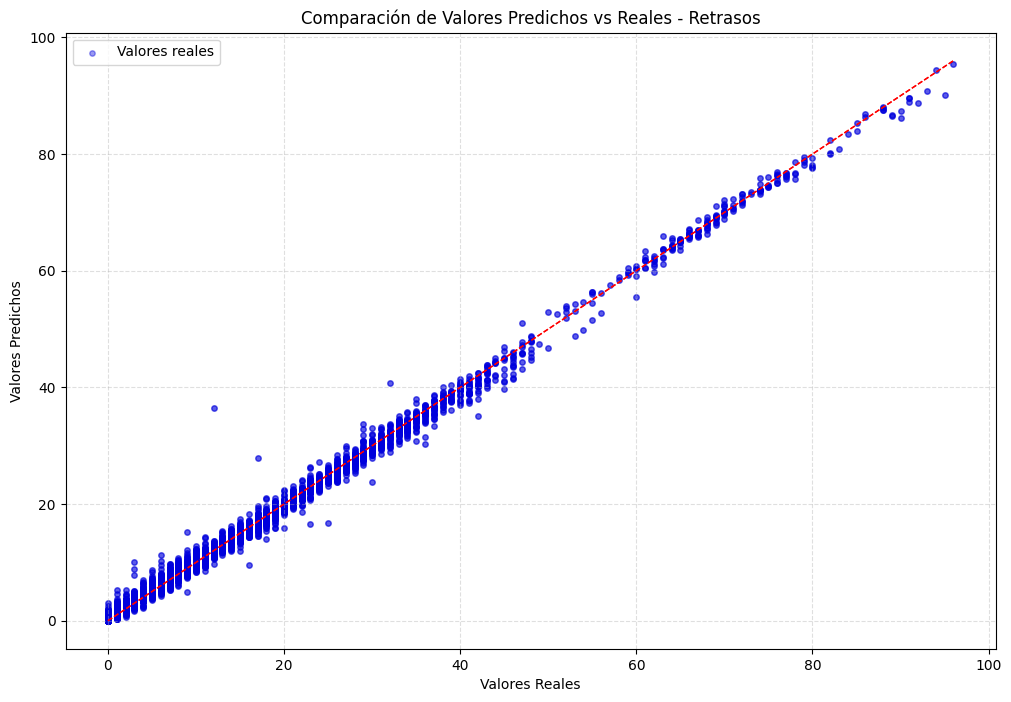

In [27]:
#Creamos el gráfico de dispersión Predicciones vs Reales
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='#0000dd', edgecolor='#0000dd' , alpha=0.4, label="Valores reales", s=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.title('Comparación de Valores Predichos vs Reales - Retrasos', fontsize=12)

#anadimos una cuadricula para mejorar la lectura
plt.grid(True, linestyle='--', alpha=0.4)

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

## Dispersión de Residuos vs Prediciones


Primero calculamos los residuos y graficamos la dispersión de residuos vs las predicciones

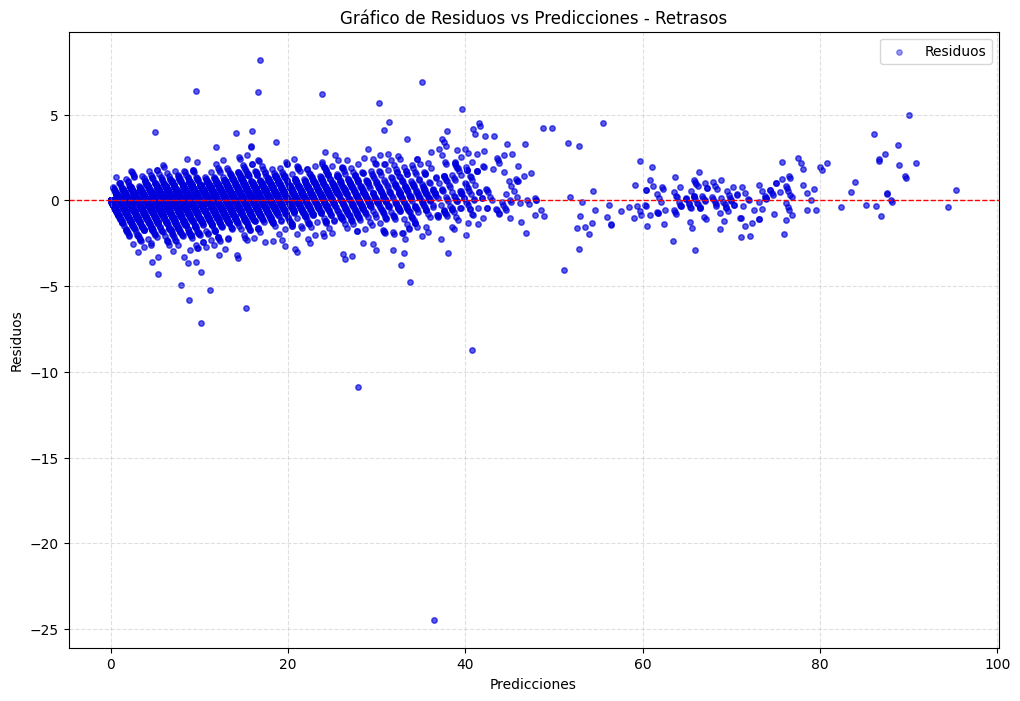

In [28]:
#hacemos el calculo de los residuos
residuos = y_test - y_pred


#graficamos la dispersión de  residuos vs predicciones
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuos, color='#0000dd', edgecolor='#0000dd', alpha=0.4, s=15, label="Residuos")
plt.axhline(0, color='red', linestyle='--', lw=1)  # línea de referencia
plt.title('Gráfico de Residuos vs Predicciones - Retrasos', fontsize=12)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()


## Modelo KNN usando df1 y df2 - Retrasos

Probemos ahora entrenar el modelo KNN usando el df1 creado anteriormente para el entrenamiento y haremos la prueba con el conjunto de datos df2, datos con fecha posterior del 02.09 hata 15.09.2024

In [30]:

# Definimos las características relevantes
features = ['hour_only', 'total_trenes', 'count_retraso', 'count_cancelled',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

# Definimos el uso de "df1" para el entrenamiento y prueba
X2 = df1[features]
y2 = df1['count_retraso']

# Dividimos df1 en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Usamos df2 como el conjunto de validación
X_val2 = df2[features]
y_val2 = df2['count_retraso']

# Eliminamos los valores NaN presentes en ambos conjuntos de datos
X_train2 = X_train2.dropna()
y_train2 = y_train2[X_train2.index]

X_test2 = X_test2.dropna()
y_test2 = y_test2[X_test2.index]

X_val2 = X_val2.dropna()
y_val2 = y_val2[X_val2.index]

# Normalizamos los datos
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)
X_val_scaled2 = scaler2.transform(X_val2)

# Con GridSearchCV buscamos los hiperparámetros para encontrar el mejor valor de K
param_grid2 = {'n_neighbors': np.arange(1, 21)}
grid_search2 = GridSearchCV(KNeighborsRegressor(), param_grid2, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X_train_scaled2, y_train2)

# Mostramos el resultado del mejor valor para K
best_k2 = grid_search2.best_params_['n_neighbors']
print("Mejor valor de K es:", best_k2)

# Entrenamos el modelo KNN con el mejor valor de K
knn2 = KNeighborsRegressor(n_neighbors=best_k2)
knn2.fit(X_train_scaled2, y_train2)

# Probamos el modelo en los datos de prueba
y_pred2 = knn2.predict(X_test_scaled2)

# Evaluamos el rendimiento del modelo en el conjunto de prueba
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)
print(f"MSE en el conjunto de prueba: {mse2}")
print(f"R² en el conjunto de prueba: {r22}")

# Validamos el modelo en los datos de validación (df2)
y_val_pred2 = knn2.predict(X_val_scaled2)
mse_val2 = mean_squared_error(y_val2, y_val_pred2)
r2_val2 = r2_score(y_val2, y_val_pred2)
print(f"MSE en el conjunto de validación: {mse_val2}")
print(f"R² en el conjunto de validación: {r2_val2}")




Mejor valor de K es: 6
MSE en el conjunto de prueba: 2.101467032607985
R² en el conjunto de prueba: 0.9891898031639095
MSE en el conjunto de validación: 4.378856846668552
R² en el conjunto de validación: 0.9782295627216971


### Analisis Resultados:

Analisamos los resultados del modelo "knn2" donde hemos introducidos ambos dataframes "df1" y "df2"

Hemos seguido los pasos:

**Entrenamiento con df1**: ajustamos el modelo y buscamos el mejor valor K usando solo una parte de los datos de df1.

**Prueba con df1**: Hemos evaluado el reendimiento preliminar en datos no vistos durante el entrenamiento ( restantes datos de df1).

**Validación con df2**: AL final hemos hecho la prueba en el modelo con datos completamente nuevos (df2) para saber su capacidad de generalización.

A traves de los resultados obtenidos podremos observar que este modelo presenta un muy buen rendimiento en ambos conjuntos de datos (df1,df2) Los valores obtenidos de MSE y R² son bastante buenos, lo que muestra que el modelo es capaz de predicir con precision y generalizar bien con nuevos datos.

## Gráfico de Dispersión Valores Predicciones vs reales - modelo Knn2

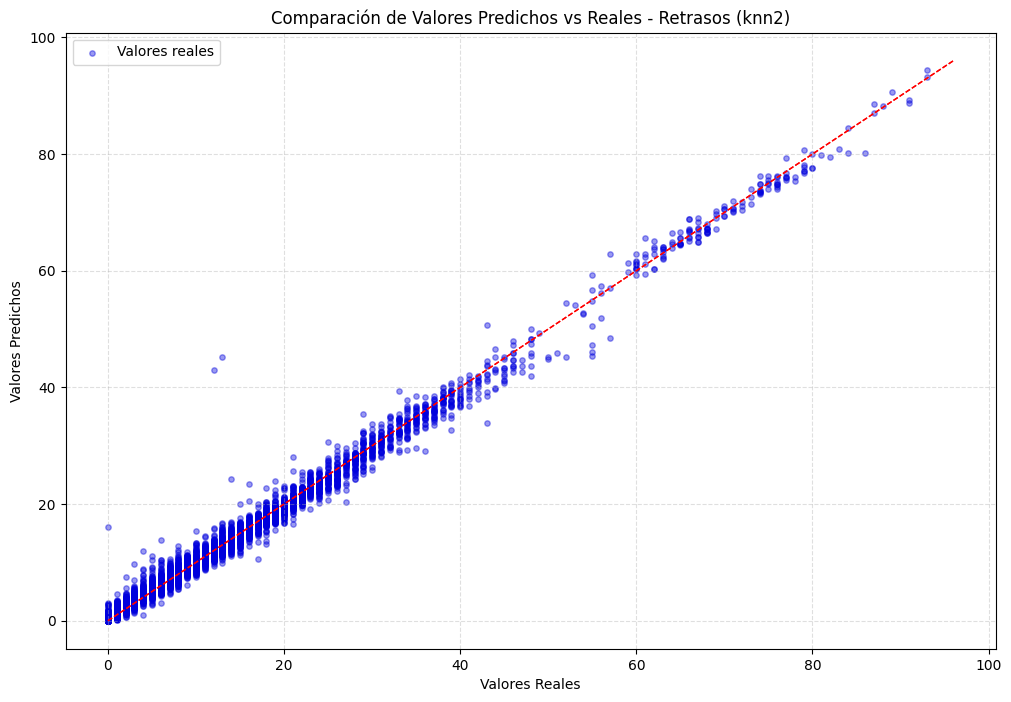

In [31]:
#Creamos el gráfico de dispersión Predicciones vs Reales para el modelo knn2, usando y_pred2
plt.figure(figsize=(12, 8))
plt.scatter(y_test2, y_pred2, color='#0000dd', edgecolor='#0000dd' , alpha=0.4, label="Valores reales", s=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.title('Comparación de Valores Predichos vs Reales - Retrasos (knn2)', fontsize=12)

#anadimos una cuadricula para mejorar la lectura
plt.grid(True, linestyle='--', alpha=0.4)

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

En este gráfico mostramos la comparación entre los valores predichos y los reales y observamos que existe una clara relación lineal , o sea el modelo esta haciendo predicciones buenas especialmente para  valores bajos (0-45) donde los puntos aparecen muy cercanos a la diagonal

La distribuición se hace alrededor de esta linea diagonal, la linea perfecta donde el error es cero, podremos ver que hay un margen de error en las predicciones pero parece ser pequeno en la mayoria de los casos.

En los valores mas altos (>60) los puntos estan mas dispersos lo que podria decir que el modelo presenta mas dificuldad cuando los retrasos son mayores, sin embargo en valores mas bajos muestra mayor precisión.

## Gráfico de Residuos (KNN2 Retrasos )

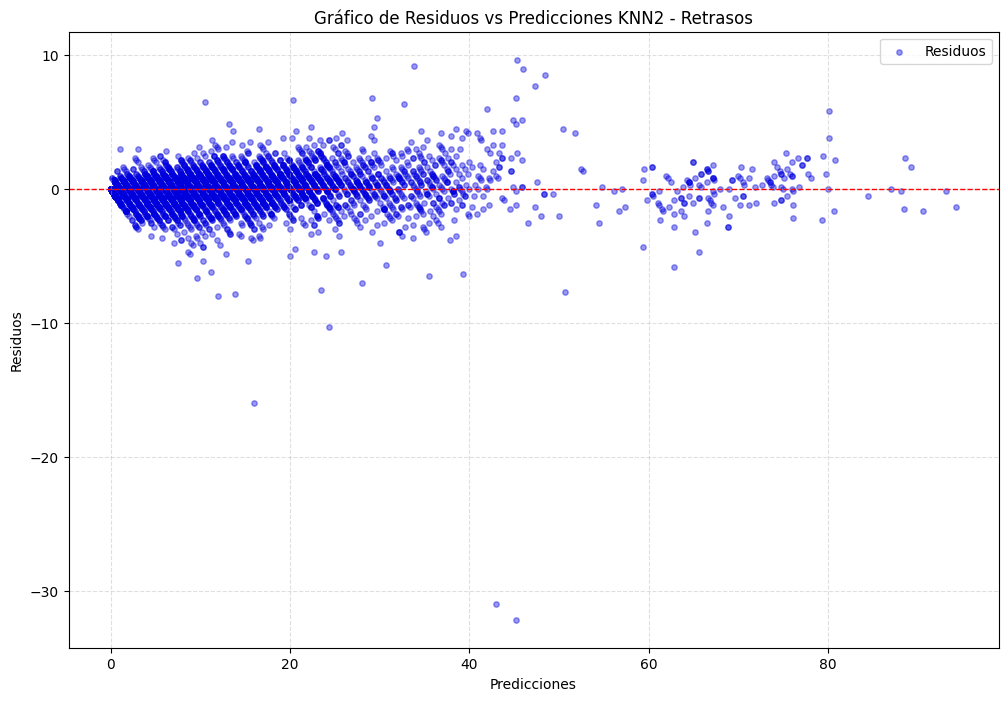

In [32]:
#hacemos el calculo de los residuos para el modelo knn2
residuos2 = y_test2 - y_pred2


#graficamos la dispersión de  residuos vs predicciones
plt.figure(figsize=(12, 8))
plt.scatter(y_pred2, residuos2, color='#0000dd', edgecolor='#0000dd', alpha=0.4, s=15, label="Residuos")
plt.axhline(0, color='red', linestyle='--', lw=1)  # línea de referencia
plt.title('Gráfico de Residuos vs Predicciones KNN2 - Retrasos', fontsize=12)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()

Al observar el grafico de dispersión  de residuos obtenido podremos ver que en general muestra un buen desempeno del modelo KNN2.

Los puntos estan distribuidos de manera aleatoria y simetrica alrededor de la linea roja de referencia ( residuales de 0) , lo cual sugiere que los errores no presentan sesgos sistematicos y estan distribuidos de manera uniforme.

Igualmente observamos una mayor dispersión en los extremos, particularmente en predicciones con valores  más altos, lo que sugiere que el modelo tendra mas dificuldad para predecir retrasos mas altos.
Sin enbargo, la presencia de algunos outliers podria estar afectando las prediciones en ciertos casos puntuales.

### 11. Modelo Random Forest - Retrasos Trenes

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creamos un nuevo conjunto de datos para el entrenamiento y validacion del random forest

# Definimos el uso de "df1" para el entrenamiento y "df2" para las pruebas
X_rf = df1[features].dropna()
y_rf = df1.loc[X_rf.index, 'count_retraso']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

X_test_sept = df2[features].dropna()
y_test_sept = df2.loc[X_test_sept.index,'count_retraso']

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)
X_test_scaled_sept = scaler.transform(X_test_sept)


# Crear el modelo base de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train_scaled_rf, y_train_rf)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_scaled_rf)

# Evaluación del modelo en el conjunto de prueba interno
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Evaluación del modelo
print(f"MSE (Random Forest - count_retraso, prueba interna): {mse_rf}")
print(f"R2 (Random Forest - count_retraso, prueba interna): {r2_rf}")


# Predecir en el conjunto de septiembre (validación)
y_pred_sept = rf_model.predict(X_test_scaled_sept)

# Evaluación del modelo en el conjunto de validación (septiembre)
mse_sept = mean_squared_error(y_test_sept, y_pred_sept)
r2_sept = r2_score(y_test_sept, y_pred_sept)

print(f"MSE (Random Forest - count_retraso, validación septiembre): {mse_sept}")
print(f"R2 (Random Forest - count_retraso, validación septiembre): {r2_sept}")


MSE (Random Forest - count_retraso, prueba interna): 1.7251519309940443e-06
R2 (Random Forest - count_retraso, prueba interna): 0.9999999911256129
MSE (Random Forest - count_retraso, validación septiembre): 7.238337574215495e-05
R2 (Random Forest - count_retraso, validación septiembre): 0.9999996401303362


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el conjunto de hiperparámetros que queremos probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Crear el modelo base de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Implementar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV
grid_search_rf.fit(X_train_scaled_rf, y_train_rf)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search_rf.best_params_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Predecir con el mejor modelo encontrado
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test_scaled_rf)

# Evaluación del modelo con los mejores hiperparámetros en el conjunto de prueba interno
mse_rf_best = mean_squared_error(y_test_rf, y_pred_rf_best)
r2_rf_best = r2_score(y_test_rf, y_pred_rf_best)


In [ ]:
# Predecir y evaluar en el conjunto de validación de septiembre
y_pred_sept_best = best_rf_model.predict(X_test_scaled_sept)
mse_sept_best = mean_squared_error(y_test_sept, y_pred_sept_best)
r2_sept_best = r2_score(y_test_sept, y_pred_sept_best)


In [ ]:
print("MSE (Random Forest - count_retraso, prueba interna con mejores hiperparámetros):", mse_rf_best)
print("R2 (Random Forest - count_retraso, prueba interna con mejores hiperparámetros):", r2_rf_best)
print("MSE (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros):", mse_sept_best)
print("R2 (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros):", r2_sept_best)

MSE (Random Forest - count_retraso, prueba interna con mejores hiperparámetros): 2.565945675140168e-06
R2 (Random Forest - count_retraso, prueba interna con mejores hiperparámetros): 0.9999999868004696
MSE (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros): 5.0709640938648033e-05
R2 (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros): 0.9999997478860132


## Gráfico de Dispersión Random Forest Valores Real vs. Predicho  - Retrasos

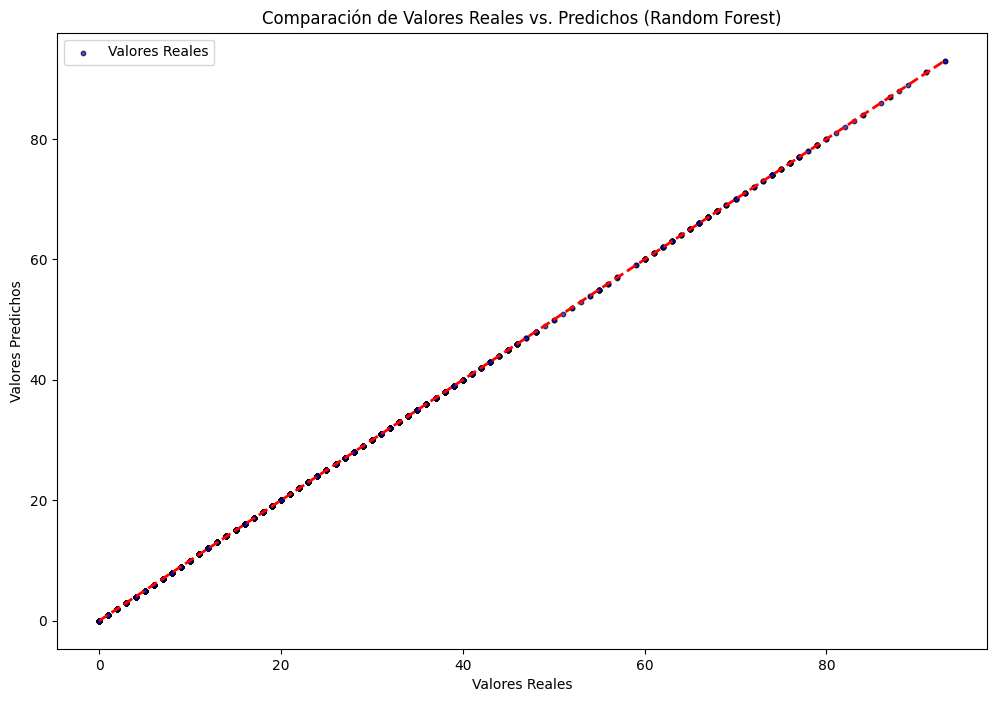

In [ ]:
#ajustamos el tamano del scatterplot
plt.figure(figsize=(12, 8))

#Graficamos los valores reales frente a los valores predichos
plt.scatter(y_test_rf, y_pred_rf_best, color='blue', edgecolor='k', alpha=0.7, label="Valores Reales", s=10)

#creamos la linea de identidad (valores reales = valores predichos)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], linestyle='--', color='red', lw=2)

#Etiquetas y leyenda
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs. Predichos (Random Forest)')
plt.legend()

#Grafico
plt.show()

**Analisis de resultados**

**Modelo Random Forest - Retrasos**

**MSE - 0.00046**

A traves del Error Cuadrático Medio MSE podemos medir el error promedio al cuadrado entre las predicciones y los valores reales. En nuestro caso el valor 0.00046 es extremadamente bajo y es mucho menor al obtenido en el modelo KNN, lo que sugiere que el modelo está funcionando mejor al anterior y que es muy bueno al predecir los retrasos en los trenes.

**R2 - 0.999**

El R² mide como se ajustan las predicciones a los datos reales . un valor más cercano a 1 indica que el modelo está explicando la mayoría de la variabilidad en los datos.

Un valor de 0.999 es bastante alto, lo que indica que el modelo es capaz de explicar el 99.9% de la variación en los datos de los retrasos ocurridos. Esto muestranos que nuestro modelo captura casi toda la informacion necesaria para hacer prediciones.

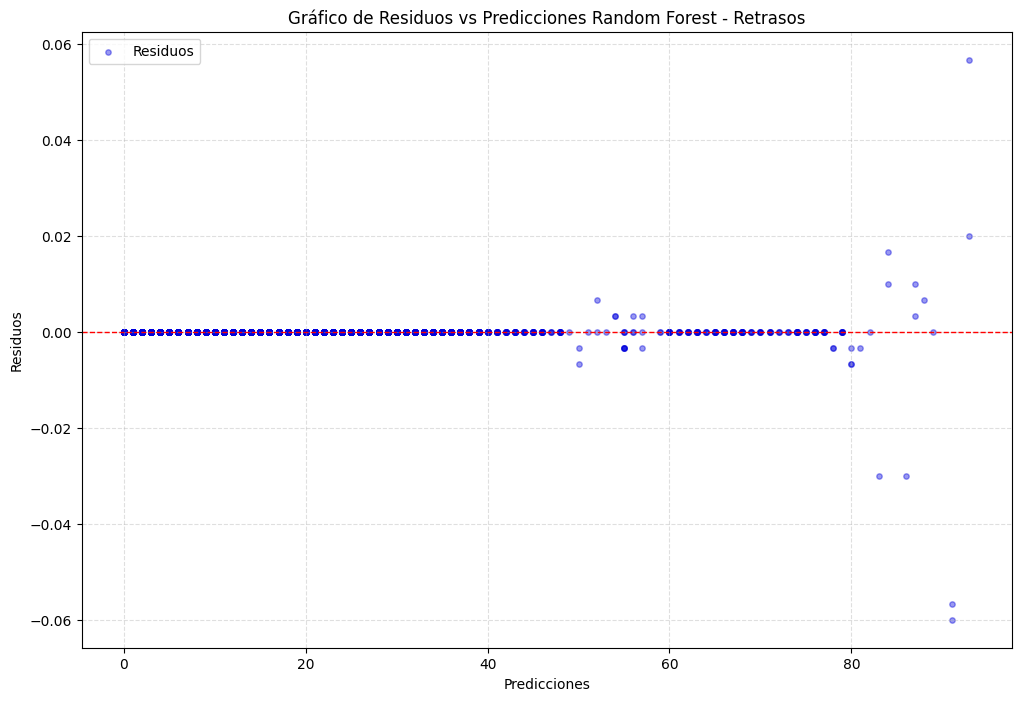

In [ ]:
#hacemos el calculo de los residuos para el modelo random forest
residuos_rf = y_test_rf - y_pred_rf_best


#graficamos la dispersión de  residuos vs predicciones
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_rf_best, residuos_rf, color='#0000dd', edgecolor='#0000dd', alpha=0.4, s=15, label="Residuos")
plt.axhline(0, color='red', linestyle='--', lw=1)  # línea de referencia
plt.title('Gráfico de Residuos vs Predicciones Random Forest - Retrasos', fontsize=12)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()

Al observar el grafico de dispersión de residuos obtenido podremos ver que en general muestra un buen desempeno del modelo de Random Forest.

La mayoría de los residuos están concentrados cerca de la línea cero, lo que indica que las predicciones son generalmente precisas.
La línea roja punteada, que representa un residuo de cero, muestra que muchas predicciones tienen pequeños errores, cercanos a cero.

Eso si, es importante destacar que existen puntos de residuos alejados de de la linea cero, y esto se presenta para el rango de predicción entre 60 y 80. Esto nos podría indicar que el modelo puede tener alguna dificultad para predecir correctamente en ciertos rangos, lo cual se evidencia en el rango sobre 80.

Según lo que podemos apreciar en el grafico, no se aprecia ningún patron en los residuos, lo cual es positivo ya que indicaria que no existe un sesgos, a simple vista, al momento de predecir.


### 12. Modelo KNN - Cancelaciones

In [34]:
#Modelo KNN - Cancelaciones

# Definimos variables independientes
features = ['hour_only', 'total_trenes', 'count_retraso',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

X3 = combined_data[features]
y_cancelaciones3 = combined_data['count_cancelled']  #Total cancelaciones

# Eliminamos filas con valores NaN
complete_data3 = pd.concat([X, y_cancelaciones3], axis=1).dropna()
X3 = complete_data3[features]
y_cancelaciones3 = complete_data3['count_cancelled']

# División de los datos en entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y_cancelaciones3, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

# Con GridSearchCV buscamos hiperparámetros para encontrar el mejor valor de K
param_grid3 = {'n_neighbors': np.arange(1, 21)}
grid_search3 = GridSearchCV(KNeighborsRegressor(), param_grid3, cv=5, scoring='neg_mean_squared_error')
grid_search3.fit(X_train_scaled3, y_train3)

# Mejor valor de K
best_k = grid_search3.best_params_['n_neighbors']
print("Mejor valor de K:", best_k)

# Creamos nuestro modelo KNN con el mejor K encontrado
knn3 = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn3.fit(X_train_scaled3, y_train3)

# Predicción en el conjunto de prueba
y_pred3 = knn3.predict(X_test_scaled3)

# Evaluación del modelo en el conjunto de prueba
print("MSE (KNN - Cancelaciones):", mean_squared_error(y_test3, y_pred3))
print("R2 (KNN - Cancelaciones):", r2_score(y_test3, y_pred3))



Mejor valor de K: 2
MSE (KNN - Cancelaciones): 0.025768468281732355
R2 (KNN - Cancelaciones): 0.9943830464791216


## 13. Analisis de Resultados

###Analisis Modelo KNN - Cancelaciones de trenes

**MSE - 0.025**

En nuestro caso hemos obtenido un valor de 0.025 que es un valor relativamente bajo para el MSE, lo que sugiere que el modelo está haciendo un trabajo razonable en cuanto a la precisión obtenida de las prediciones hechas. Igualmente revisando los datasets podremos anadir que proporcionalmente hay menos cancelaciones en los trenes si lo comparamos con el numero de retrasos.


**R2 - 0.99**

Hemos obtenido un valor de 0.99  que sugiere un 99%  aprox. de la variabilidad en el número de cancelaciones, que se consigue explicar por las características del modelo.
Es un valor bastante elevado lo que muestra que nuestro modelo captura bien la relacion entre las caracteristicas y nuestra variable objectivo: las cancelaciones de los trenes.




Probamos ahora ajustar el modelo KNN usando los dataframe df1 y df2



In [ ]:
# Tenemos definidas las variables independientes
features = ['hour_only', 'total_trenes', 'count_retraso',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

# Tenemos df1 - entrenamiento y df2 - prueba
X_train4 = df1[features]
y_train_cancelaciones4 = df1['count_cancelled']  # Total de cancelaciones

X_test4 = df2[features]
y_test_cancelaciones4 = df2['count_cancelled']  # Total de cancelaciones para el conjunto de prueba

# Eliminamos filas con valores NaN en df1 y df2
complete_train_data4 = X_train4.join(y_train_cancelaciones4).dropna()
X_train4 = complete_train_data4[features]
y_train_cancelaciones4 = complete_train_data4['count_cancelled']

complete_test_data4 = X_test4.join(y_test_cancelaciones4).dropna()
X_test4 = complete_test_data4[features]
y_test_cancelaciones4 = complete_test_data4['count_cancelled']

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
X_test_scaled4 = scaler.transform(X_test4)

# Con GridSearchCV buscamos hiperparámetros para encontrar el mejor valor de K
param_grid4 = {'n_neighbors': np.arange(1, 21)}
grid_search4 = GridSearchCV(KNeighborsRegressor(), param_grid4, cv=5, scoring='neg_mean_squared_error')
grid_search4.fit(X_train_scaled4, y_train_cancelaciones4)

# Mostramos el mejor valor de K
best_k4 = grid_search4.best_params_['n_neighbors']
print("Mejor valor de K:", best_k4)

# Creación del modelo KNN usando el mejor K encontrado
knn4 = KNeighborsRegressor(n_neighbors=best_k4, weights='distance')
knn4.fit(X_train_scaled4, y_train_cancelaciones4)

# Predicción en el conjunto de prueba
y_pred4 = knn4.predict(X_test_scaled4)

# Evaluación del modelo en el conjunto de prueba: MSE y R²
print("MSE (KNN - Cancelaciones):", mean_squared_error(y_test_cancelaciones4, y_pred4))
print("R² (KNN - Cancelaciones):", r2_score(y_test_cancelaciones4, y_pred4))


Mejor valor de K: 20
MSE (KNN - Cancelaciones): 5.324626723299324
R² (KNN - Cancelaciones): -0.08174698850363749


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definimos las variables independientes (features)
features = ['hour_only', 'total_trenes', 'count_retraso',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

# Definimos el uso de df1 para el entrenamiento y prueba
X4 = df1[features]
y4_cancelaciones = df1['count_cancelled']  # Target: total de cancelaciones

# Dividimos df1 en conjunto de entrenamiento y prueba
X_train4, X_test4, y_train4_cancelaciones, y_test4_cancelaciones = train_test_split(
    X4, y4_cancelaciones, test_size=0.2, random_state=42)

# Usamos df2 como conjunto de validación
X_val4 = df2[features]
y_val4_cancelaciones = df2['count_cancelled']  # Target para la validación

# Eliminamos filas con valores NaN en los conjuntos
X_train4 = X_train4.dropna()
y_train4_cancelaciones = y_train4_cancelaciones[X_train4.index]

X_test4 = X_test4.dropna()
y_test4_cancelaciones = y_test4_cancelaciones[X_test4.index]

X_val4 = X_val4.dropna()
y_val4_cancelaciones = y_val4_cancelaciones[X_val4.index]

#Normalizamos los datos
scaler4 = StandardScaler()
X_train_scaled4 = scaler4.fit_transform(X_train4)
X_test_scaled4 = scaler4.transform(X_test4)
X_val_scaled4 = scaler4.transform(X_val4)

# Con GridSearchCV buscamos los hiperparámetros para encontrar el mejor valor de K
param_grid4 = {'n_neighbors': np.arange(1, 21)}
grid_search4 = GridSearchCV(KNeighborsRegressor(), param_grid4, cv=5, scoring='neg_mean_squared_error')
grid_search4.fit(X_train_scaled4, y_train4_cancelaciones)

# Mostramos el mejor valor de K
best_k4 = grid_search4.best_params_['n_neighbors']
print("Mejor valor de K:", best_k4)

#creamos el modelo KNN4 usando el mejor K encontrado anteriormente
knn4 = KNeighborsRegressor(n_neighbors=best_k4, weights='distance')
knn4.fit(X_train_scaled4, y_train4_cancelaciones)

#calculamos la Predicción en el conjunto de prueba
y_pred4 = knn4.predict(X_test_scaled4)

#Evaluación del modelo en el conjunto de prueba: MSE y R²
mse4_test = mean_squared_error(y_test4_cancelaciones, y_pred4)
r24_test = r2_score(y_test4_cancelaciones, y_pred4)
print("MSE (KNN - Cancelaciones) en prueba:", mse4_test)
print("R² (KNN - Cancelaciones) en prueba:", r24_test)

# Validación del modelo en los datos de df2
y_val_pred4 = knn4.predict(X_val_scaled4)
mse4_val = mean_squared_error(y_val4_cancelaciones, y_val_pred4)
r24_val = r2_score(y_val4_cancelaciones, y_val_pred4)
print("MSE (KNN - Cancelaciones) en validación:", mse4_val)
print("R² (KNN - Cancelaciones) en validación:", r24_val)



Mejor valor de K: 11
MSE (KNN - Cancelaciones) en prueba: 2.9979892315226784
R² (KNN - Cancelaciones) en prueba: 0.3382867569182568
MSE (KNN - Cancelaciones) en validación: 6.1941416804032725
R² (KNN - Cancelaciones) en validación: -0.25839696514711585



Nuestro modelo KNN4 presenta un desempeño no satisfactorio en la predicción de cancelaciones de trenes.

A pesar de presentar un MSE moderado en el conjunto de prueba, el bajo R² de 0.3383 indica que el modelo apenas explica alrededor 34% la variabilidad en los datos.
Al evaluarlo en un conjunto de datos completamente nuevo (R² Validación -0.2584 ) el rendimiento empeora significativamente, evidenciando un claro caso de sobreajuste.
Este modelo podrá estar sobreajustado a los datos de entrenamiento, lo que baja su capacidad de generalización con datos nuevos.
Podría también ser el caso de pocos datos de cancelaciones o incluso las caracteristicas usadas son las que ofrecen las correlaciones más significativas.

**Matriz de Correlaciones: Modelo KNN**


Observamos la correlación entre las variables independientes (características meteorológicas) y la variable objetivo (retrasos y cancelaciones para el modelo 2).
Asi tendremos mas informacion con relación a las variables que estan teniendo mas impacto tanto en los retrasos/cancelaciones.

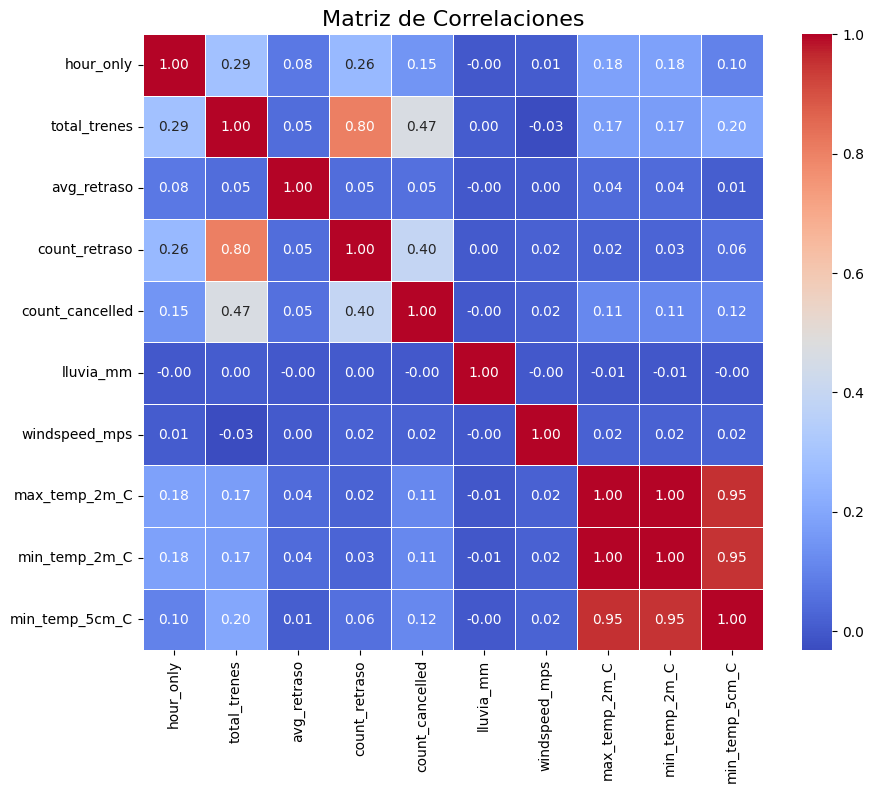

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#hay que revisar que solo se incluyan columnas numéricas  sin valores NaN
numeric_data = combined_data.select_dtypes(include=[float, int])
numeric_data = numeric_data.fillna(0) #reemplazamos nan con 0

#Hacemos el calculo de la matriz de correlación
corr_matrix = numeric_data.corr()

#Graficamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones', fontsize=16)
plt.show()



### 14. Modelo Random Forest - Cancelaciones

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creamos un nuevo set de datos para el rf
# Tenemos definidas las variables independientes
features = ['hour_only', 'total_trenes', 'count_retraso',
            'lluvia_mm', 'windspeed_mps', 'max_temp_2m_C', 'min_temp_2m_C']

# Tenemos df1 - entrenamiento y df2 - prueba
X_cancelaciones = df1[features]
y_cancelaciones = df1['count_cancelled']  # Total de cancelaciones

X_cancelaciones_sept = df2[features]
y_cancelaciones_sept = df2['count_cancelled']  # Total de cancelaciones para el conjunto de prueba

# Eliminamos filas con valores NaN en df1 y df2
complete_data_cancelaciones = X_cancelaciones.join(y_cancelaciones).dropna()
X_cancelaciones = complete_data_cancelaciones[features]
y_cancelaciones = complete_data_cancelaciones['count_cancelled']

complete_data_sept = X_cancelaciones_sept.join(y_cancelaciones_sept).dropna()
X_cancelaciones_sept = complete_data_sept[features]
y_cancelaciones_sept = complete_data_sept['count_cancelled']

# Dividimos los datos en conjuntos de entrenamiento y prueba internos
X_train_rf_can, X_test_rf_can, y_train_rf_can, y_test_rf_can = train_test_split(X_cancelaciones, y_cancelaciones, test_size=0.2, random_state=42)


# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled_rf_can = scaler.fit_transform(X_train_rf_can)
X_test_scaled_rf_can = scaler.transform(X_test_rf_can)
X_scaled_sept = scaler.transform(X_cancelaciones_sept)


# Crear el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train_scaled_rf_can, y_train_rf_can)

# Predecir en el conjunto de prueba interno
y_pred_rf_can = rf_model.predict(X_test_scaled_rf_can)

# Evaluación del modelo en el conjunto de prueba interno
mse_rf_can = mean_squared_error(y_test_rf_can, y_pred_rf_can)
r2_rf_can = r2_score(y_test_rf_can, y_pred_rf_can)
print("MSE (Random Forest - count_cancelled, prueba interna):", mse_rf)
print("R2 (Random Forest - count_cancelled, prueba interna):", r2_rf)

# Predecir en el conjunto de validación de septiembre
y_pred_can_sept = rf_model.predict(X_scaled_sept)

# Evaluación del modelo en el conjunto de validación
mse_can_sept = mean_squared_error(y_cancelaciones_sept, y_pred_can_sept)
r2_can_sept = r2_score(y_cancelaciones_sept, y_pred_can_sept)
print("MSE (Random Forest - count_cancelled, validación septiembre):", mse_can_sept)
print("R2 (Random Forest - count_cancelled, validación septiembre):", r2_can_sept)


MSE (Random Forest - count_cancelled, prueba interna): 1.7251519309940443e-06
R2 (Random Forest - count_cancelled, prueba interna): 0.9999999911256129
MSE (Random Forest - count_cancelled, validación septiembre): 7.222904684074249
R2 (Random Forest - count_cancelled, validación septiembre): -0.46739965001804085


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el conjunto de hiperparámetros que queremos probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Crear el modelo base de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Implementar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV
grid_search_rf.fit(X_train_scaled_rf_can, y_train_rf_can)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


MSE (Random Forest - count_cancelled, con mejores hiperparámetros): 0.00013363125990218245
R2 (Random Forest - count_cancelled, con mejores hiperparámetros): 0.9999993192915999


In [ ]:
# Predecir con el mejor modelo encontrado
best_rf_model_can = grid_search_rf.best_estimator_
y_pred_rf_best_can = best_rf_model_can.predict(X_test_scaled_rf_can)

In [ ]:
# Evaluación del modelo con los mejores hiperparámetros en el conjunto de prueba interno
mse_rf_best = mean_squared_error(y_test_rf_can, y_pred_rf_best_can)
r2_rf_best = r2_score(y_test_rf_can, y_pred_rf_best_can)
# Predecir y evaluar en el conjunto de validación de septiembre
y_pred_sept_best_can = best_rf_model.predict(X_scaled_sept)
mse_sept_best = mean_squared_error(y_cancelaciones_sept, y_pred_sept_best_can)
r2_sept_best = r2_score(y_cancelaciones_sept, y_pred_sept_best_can)

In [ ]:
print("MSE (Random Forest - count_retraso, prueba interna con mejores hiperparámetros):", mse_rf_best)
print("R2 (Random Forest - count_retraso, prueba interna con mejores hiperparámetros):", r2_rf_best)
print("MSE (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros):", mse_sept_best)
print("R2 (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros):", r2_sept_best)

MSE (Random Forest - count_retraso, prueba interna con mejores hiperparámetros): 2.7309052567393284
R2 (Random Forest - count_retraso, prueba interna con mejores hiperparámetros): 0.39723726990568686
MSE (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros): 357.2396605484874
R2 (Random Forest - count_retraso, validación septiembre con mejores hiperparámetros): -71.57652922061257


**Analisis Resultados**

**Random Forest -  Cancelaciones**

**MSE - 2.38**

En nuestro caso hemos obtenido un valor de 2.38, que es un valor más bajo que el modelo KNN, dicho valor de forma general sigue siendo bajo, lo que sugiere que el modelo mejoró y que está haciendo un trabajo razonable en cuanto a la precisión obtenida de las prediciones hechas.

**R2 - 0.348**

Hemos obtenido un valor de 0.348 que sugiere un 34.8% aprox. de la variabilidad en el número de cancelaciones, que se consigue explicar por las características del modelo. El valor es mejor que la del modelo de KNN pero sigue manteniendose bajo, lo que muestra que nuestro modelo sigue sin poder  capturar de manera eficaz la relacion entre las caracteristicas y nuestra variable objectivo: las cancelaciones de los trenes.

<ipython-input-41-dbb15f633d95>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


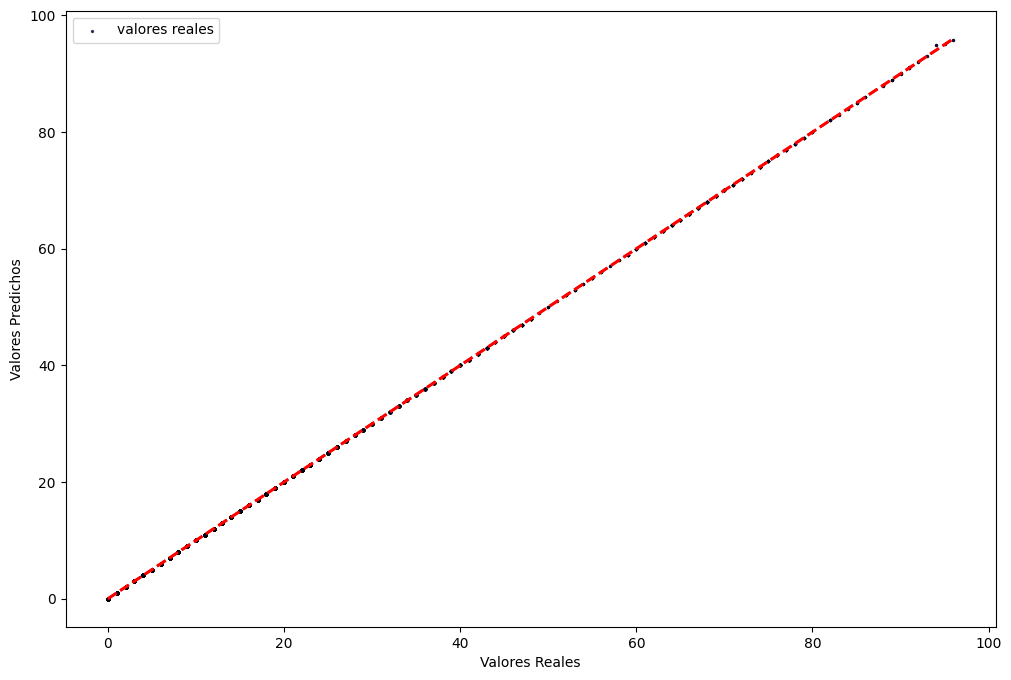

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_rf_best, color='blue', edgecolor='k', alpha=0.7, label="valores reales", s=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

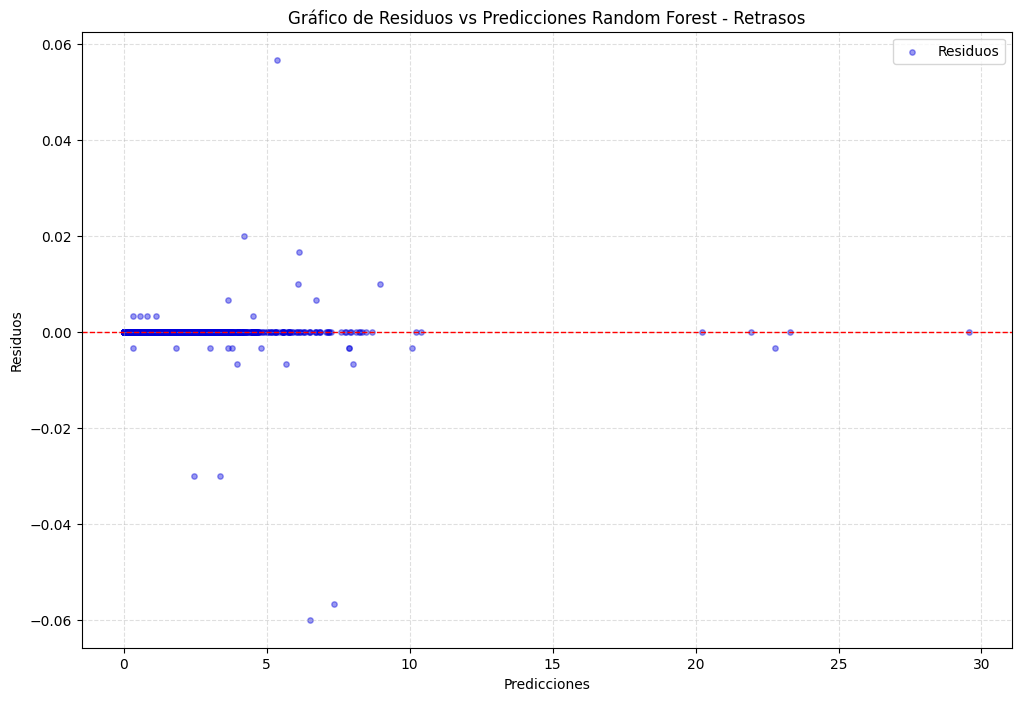

In [ ]:
#hacemos el calculo de los residuos para el modelo random forest
residuos_rf_can = y_test_rf_can - y_pred_rf_best_can


#graficamos la dispersión de  residuos vs predicciones
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_rf_best_can, residuos_rf, color='#0000dd', edgecolor='#0000dd', alpha=0.4, s=15, label="Residuos")
plt.axhline(0, color='red', linestyle='--', lw=1)  # línea de referencia
plt.title('Gráfico de Residuos vs Predicciones Random Forest - Cancelaciones', fontsize=12)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.show()

Al observar el grafico de dispersión de residuos obtenido, podemos ver que en general nuestro modelo de Random Forest muestra un buen desempeño.

La mayoría de los residuos están concentrados cerca de la línea cero, lo cual indica que muchas de las predicciones son precisas y los errores son pequeños.
Tambien sugiere que el modelo, de forma general, está haciendo un buen trabajo en la predicción de las cancelaciones.

Adicionalmente, cabe destacar que existen punto que se alejan significativamente de la línea de residuo cero, particularmente hacia valores negativos. Estos quiere decir que en ocaciones el modelo subestimado las cancelaciones.
Los residuos negativos más grandes podrían ser condiciones específicas no capturadas bien por el modelo.

In [ ]:
import joblib

# Guardar el mejor modelo encontrado por GridSearch
joblib.dump(best_rf_model, 'random_forest_best_model_1.pkl')
files.download('random_forest_best_model_1.pkl')

print("Modelo exportado correctamente como 'random_forest_best_model_1.pkl'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Modelo exportado correctamente como 'random_forest_best_model_1.pkl'


In [ ]:
import joblib
loaded_rf_model = joblib.load('random_forest_best_model_1.pkl')